tgb - 9/28/2020 - Analyzing Liran's runs to design new real-geography NNs

In [1]:
from cbrain.imports import *
from cbrain.data_generator import *
from cbrain.cam_constants import *
from cbrain.losses import *
from cbrain.utils import limit_mem
from cbrain.layers import *
from cbrain.data_generator import DataGenerator
import tensorflow as tf
import tensorflow.math as tfm
#import tensorflow_probability as tfp
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import xarray as xr
import numpy as np
from cbrain.model_diagnostics import ModelDiagnostics
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as imag
import scipy.integrate as sin
#import cartopy.crs as ccrs
import matplotlib.ticker as mticker
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pickle
# import sklearn
# from sklearn.linear_model import LinearRegression
# from scipy import stats

# Otherwise tensorflow will use ALL your GPU RAM for no reason

limit_mem()

/work/05823/tg851228/stampede2/MINICONDA/envs/cbrain_1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/work/05823/tg851228/stampede2/MINICONDA/envs/cbrain_1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/work/05823/tg851228/stampede2/MINICONDA/envs/cbrain_1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", n

/home1/05823/tg851228/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog


In [2]:
# path_folder = '/DFS-L/DATA/pritchard/liranp/CESM2_f19_v3_updated_NN_pelayout01_ens_07/run/'
# path = 'CESM2_f19_v3_updated_NN_pelayout01_ens_07.cam.h1.2003-02-09-57600.nc'

path_folder = '/scratch/07088/tg863871/CESM2_f19_v13_updated_NN_pelayout01_ens_07/run/'
path = 'CESM2_f19_v13_updated_NN_pelayout01_ens_07.cam.h1.2003-03-02-57600.nc'

In [3]:
data = xr.open_dataset(path_folder+path)

In [4]:
data

<xarray.Dataset>
Dimensions:          (ilev: 27, lat: 96, lev: 26, lon: 144, nbnd: 2, time: 16)
Coordinates:
  * lat              (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon              (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lev              (lev) float64 3.545 7.389 13.97 23.94 ... 929.6 970.6 992.6
  * ilev             (ilev) float64 2.194 4.895 9.882 ... 956.0 985.1 1e+03
  * time             (time) object 2003-03-02 16:00:00 ... 2003-03-02 23:30:00
Dimensions without coordinates: nbnd
Data variables:
    gw               (lat) float64 ...
    hyam             (lev) float64 ...
    hybm             (lev) float64 ...
    P0               float64 ...
    hyai             (ilev) float64 ...
    hybi             (ilev) float64 ...
    date             (time) int32 ...
    datesec          (time) int32 ...
    time_bnds        (time, nbnd) object ...
    date_written     (time) |S8 ...
    time_written     (time) |S8 ...
    ndbase           int32 ...
    nsbase           int32 ...
    nbdate           int32 ...
    nbsec            int32 ...
    mdt              int32 ...
    ndcur            (time) int32 ...
    nscur            (time) int32 ...
    co2vmr           (time) float64 ...
    ch4vmr           (time) float64 ...
    n2ovmr           (time) float64 ...
    f11vmr           (time) float64 ...
    f12vmr           (time) float64 ...
    sol_tsi          (time) float64 ...
    nsteph           (time) int32 ...
    CLDICEAP         (time, lev, lat, lon) float32 ...
    CLDICEBC         (time, lev, lat, lon) float32 ...
    CLDICEBP         (time, lev, lat, lon) float32 ...
    CLDLIQAP         (time, lev, lat, lon) float32 ...
    CLDLIQBC         (time, lev, lat, lon) float32 ...
    CLDLIQBP         (time, lev, lat, lon) float32 ...
    CLOUD            (time, lev, lat, lon) float32 ...
    FLDS             (time, lat, lon) float32 ...
    FLNS             (time, lat, lon) float32 ...
    FLNT             (time, lat, lon) float32 ...
    FSDS             (time, lat, lon) float32 ...
    FSNS             (time, lat, lon) float32 ...
    FSNT             (time, lat, lon) float32 ...
    LHFLX            (time, lat, lon) float32 ...
    NN2L_BCPHIDRY    (time, lat, lon) float32 ...
    NN2L_BCPHIWET    (time, lat, lon) float32 ...
    NN2L_BCPHODRY    (time, lat, lon) float32 ...
    NN2L_CO2DIAG     (time, lat, lon) float32 ...
    NN2L_CO2PROG     (time, lat, lon) float32 ...
    NN2L_DSTDRY1     (time, lat, lon) float32 ...
    NN2L_DSTDRY2     (time, lat, lon) float32 ...
    NN2L_DSTDRY3     (time, lat, lon) float32 ...
    NN2L_DSTDRY4     (time, lat, lon) float32 ...
    NN2L_DSTWET1     (time, lat, lon) float32 ...
    NN2L_DSTWET2     (time, lat, lon) float32 ...
    NN2L_DSTWET3     (time, lat, lon) float32 ...
    NN2L_DSTWET4     (time, lat, lon) float32 ...
    NN2L_FLWDS       (time, lat, lon) float32 ...
    NN2L_NETSW       (time, lat, lon) float32 ...
    NN2L_OCPHIDRY    (time, lat, lon) float32 ...
    NN2L_OCPHIWET    (time, lat, lon) float32 ...
    NN2L_OCPHODRY    (time, lat, lon) float32 ...
    NN2L_PBOT        (time, lat, lon) float32 ...
    NN2L_PRECC       (time, lat, lon) float32 ...
    NN2L_PRECL       (time, lat, lon) float32 ...
    NN2L_PRECSC      (time, lat, lon) float32 ...
    NN2L_PRECSL      (time, lat, lon) float32 ...
    NN2L_PSL         (time, lat, lon) float32 ...
    NN2L_QBOT        (time, lat, lon) float32 ...
    NN2L_RHO         (time, lat, lon) float32 ...
    NN2L_SOLL        (time, lat, lon) float32 ...
    NN2L_SOLLD       (time, lat, lon) float32 ...
    NN2L_SOLS        (time, lat, lon) float32 ...
    NN2L_SOLSD       (time, lat, lon) float32 ...
    NN2L_TBOT        (time, lat, lon) float32 ...
    NN2L_THBOT       (time, lat, lon) float32 ...
    NN2L_UBOT        (time, lat, lon) float32 ...
    NN2L_VBOT        (time, lat, lon) float32 ...
    NN2L_ZBOT        (time, lat, lon) float32 ...
    PRECC            (time, la

# List inputs

```
Inputs = (TBP,QBP,CLDLIQBP,CLDICEBP,PS,SOLIN,SHFLX[t-1],LHFLX[t-1])
```

## TBP = Direclty in the dataset

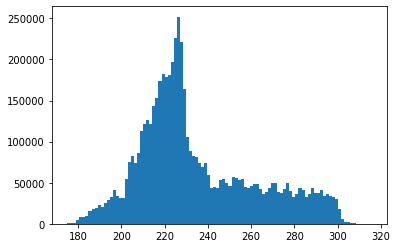

In [6]:
plt.hist(data.TBP.values.flatten(),bins=100);

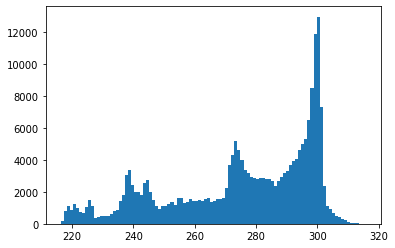

In [6]:
plt.hist(data.TBP[:,-1,:,:].values.flatten(),bins=100);

## QBP = Directly in the dataset

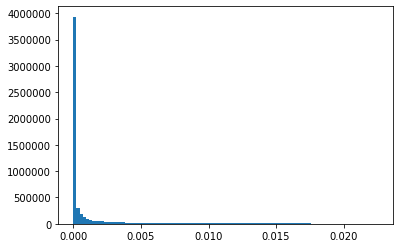

In [7]:
plt.hist(data.QBP.values.flatten(),bins=100);

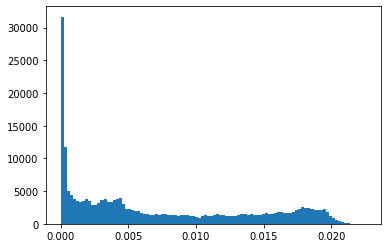

In [8]:
plt.hist(data.QBP[:,-1,:,:].values.flatten(),bins=100);

Note that we also have RH just in case it could be a better input than QBP

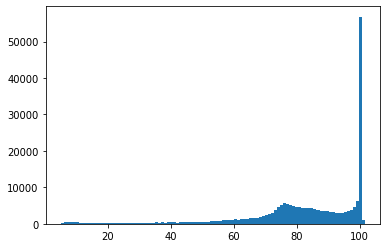

In [13]:
plt.hist(data.RELHUM[:,-1,:,:].values.flatten(),bins=100);

## CLDLIQBP = Directly in the dataset

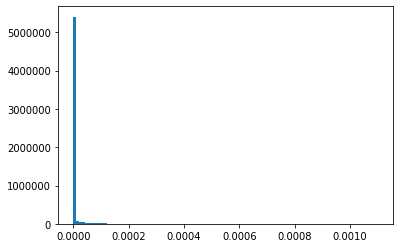

In [7]:
plt.hist(data.CLDLIQBP.values.flatten(),bins=100);

## CLDICEBP = Directly in the dataset

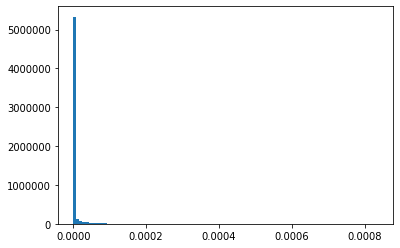

In [8]:
plt.hist(data.CLDICEBP.values.flatten(),bins=100);

## PS = Directly in the dataset

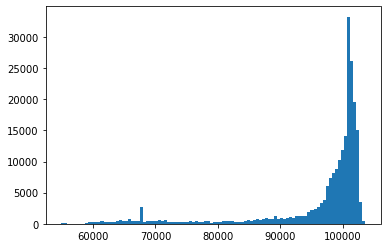

In [9]:
plt.hist(data.PS.values.flatten(),bins=100);

## SOLIN = Directly in the dataset

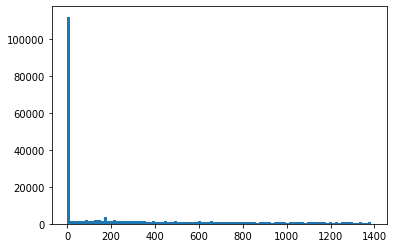

In [10]:
plt.hist(data.SOLIN.values.flatten(),bins=100);

## SHFLX, LHFLX = Directly in the dataset  
Be careful about timestep and pre-process it similarly to what is done in the CBRAIN repository

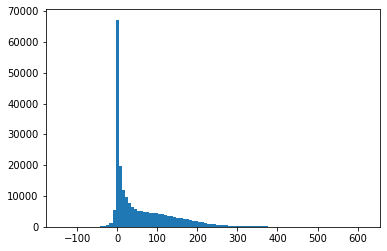

In [12]:
plt.hist(data.LHFLX.values.flatten(),bins=100);

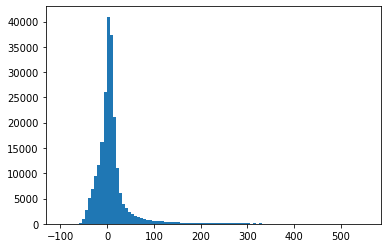

In [11]:
plt.hist(data.SHFLX.values.flatten(),bins=100);

# List outputs

```
Outputs = (TBCTEND=(TCP-TBP)/DT,QBCTEND=(QCP-QBP)/DT,CLDLIQBCTEND=(CLDLIQCP-CLDLIQBP)/DT,CLDICEBCTEND=(CLDICECP-CLDICEBP)/DT,NN2L_FLWDS,NN2L_NETSW(misleading name as it's downwelling shortwave),NN2L_PRECC,NN2L_PRECL,NN2L_PRECSC,NN2L_PRECSL,NN2L_SOLL,NN2L_SOLLD,NN2L_SOLS,NN2L_SOLSD)
```

## Remake scale_dict in the process

In [14]:
scale_dict1 = load_pickle('/home1/05823/tg851228/SPCAM/CBRAIN-CAM/nn_config/scale_dicts/001_toms_scaling.pkl')

In [16]:
scale_dict_RH = scale_dict1

## Recalculate dP for this dataset

In [22]:
P = data.P0.values*data.hyai.values+np.mean(data.PS.values.flatten())*data.hybi.values

In [23]:
dP = P[1:]-P[:-1]

In [25]:
dP # in Pa

array([ 270.1142    ,  498.7209    ,  816.9592    , 1178.523     ,
       1478.61      , 1698.253     , 1690.656     , 1331.95427397,
       1566.97695484, 1843.46566368, 2168.74308628, 2551.41513248,
       3001.60138963, 3531.23832042, 4154.31436172, 4887.33212915,
       5749.6949198 , 6764.21549835, 7957.75620907, 9361.88773322,
       9150.57864478, 8329.981002  , 6949.38516288, 5066.6532039 ,
       2799.28299743, 1435.98344138])

## TBCTEND = Calculate from TBC, TBP and DT

In [17]:
TBCTEND = (data.TBC-data.TBP)/DT

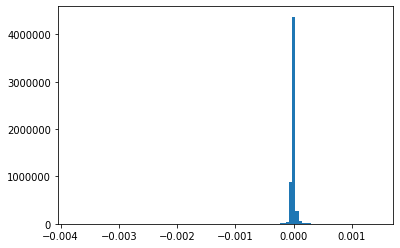

In [19]:
plt.hist(TBCTEND.values.flatten(),bins=100);

In [30]:
scale_dict_RH['TBCTEND'] = np.float32(C_P*dP/G)

In [31]:
scale_dict_RH['TBCTEND']

array([ 27673.17 ,  51093.902,  83697.38 , 120739.55 , 151483.44 ,
       173985.83 , 173207.52 , 136458.56 , 160536.61 , 188862.86 ,
       222187.48 , 261392.2  , 307513.72 , 361774.97 , 425609.03 ,
       500706.62 , 589055.6  , 692993.1  , 815271.25 , 959124.4  ,
       937475.75 , 853405.6  , 711963.75 , 519078.06 , 286786.22 ,
       147116.34 ], dtype=float32)

(-200, 200)

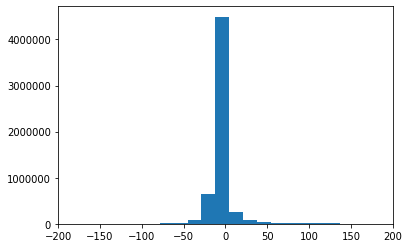

In [49]:
plt.hist((np.moveaxis(np.tile(scale_dict_RH['TBCTEND'],(16,96,144,1)),-1,1)*\
          TBCTEND_values).flatten(),bins=100);
plt.xlim((-200,200))

## QBCTEND = Calculate from QBC, QBP, and DT

In [34]:
QBCTEND = (data.QBC-data.QBP)/DT

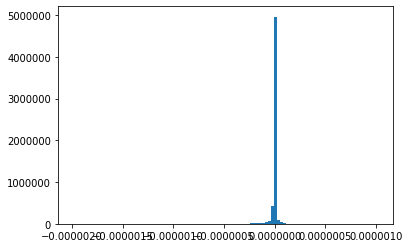

In [35]:
plt.hist(QBCTEND.values.flatten(),bins=100);

In [50]:
scale_dict_RH['QBCTEND'] = np.float32(L_V*dP/G)

(-200, 200)

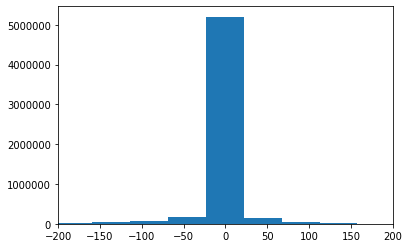

In [52]:
plt.hist((np.moveaxis(np.tile(scale_dict_RH['QBCTEND'],(16,96,144,1)),-1,1)*\
          QBCTEND.values).flatten(),bins=100);
plt.xlim((-200,200))

For that one, it may be strategic to constrain the output so that the final result (QBC) is positive, which means that you would be adding a ReLU after your prediction

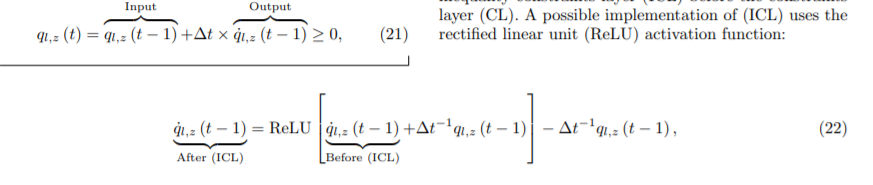

i.e. the *physical constraint* is  
1) Predict QBCTEND   
2) Take ReLU(QBCTEND+QBP/DT) - QBP/DT

## CLDLIQBCTEND = (CLDLIQBC-CLDLIQBP)/DT

In [53]:
CLDLIQBCTEND = (data.CLDLIQBC-data.CLDLIQBP)/DT

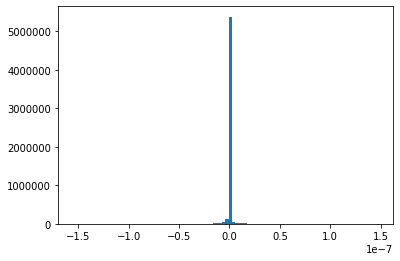

In [54]:
plt.hist(CLDLIQBCTEND.values.flatten(),bins=100);

In [55]:
scale_dict_RH['CLDLIQBCTEND'] = np.float32(L_V*dP/G)

(-200, 200)

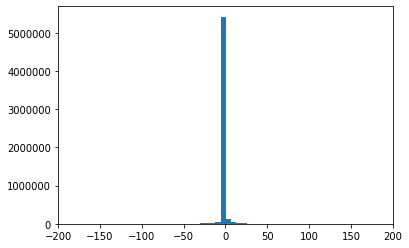

In [56]:
plt.hist((np.moveaxis(np.tile(scale_dict_RH['CLDLIQBCTEND'],(16,96,144,1)),-1,1)*\
          CLDLIQBCTEND.values).flatten(),bins=100);
plt.xlim((-200,200))

i.e. the *physical constraint* is  
1) Predict CLDLIQBCTEND   
2) Take ReLU(CLDLIQBCTEND+CLDLIQBP/DT) - CLDLIQBP/DT

## CLDICETEND = (CLDICEBC-CLDICEBP)/DT

In [57]:
CLDICEBCTEND = (data.CLDICEBC-data.CLDICEBP)/DT

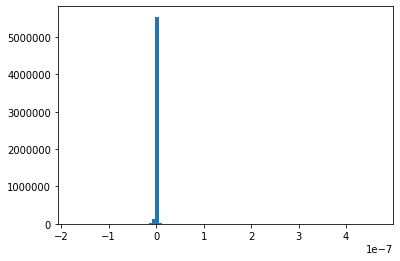

In [58]:
plt.hist(CLDICEBCTEND.values.flatten(),bins=100);

In [59]:
scale_dict_RH['CLDICEBCTEND'] = np.float32(L_V*dP/G)

(-200, 200)

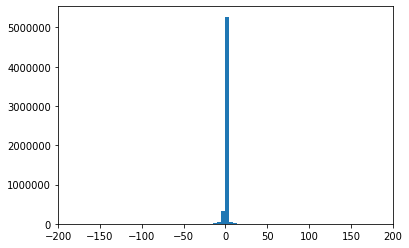

In [60]:
plt.hist((np.moveaxis(np.tile(scale_dict_RH['CLDICEBCTEND'],(16,96,144,1)),-1,1)*\
          CLDICEBCTEND.values).flatten(),bins=100);
plt.xlim((-200,200))

i.e. the *physical constraint* is  
1) Predict CLDICEBCTEND   
2) Take ReLU(CLDICEBCTEND+CLDICEBP/DT) - CLDICEBP/DT

## NN2L_FLWDS

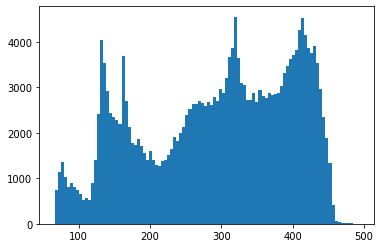

In [64]:
plt.hist(data.NN2L_FLWDS.values.flatten(),bins=100);

In [65]:
scale_dict_RH['NN2L_FLWDS'] = 1.

i.e. the *physical constraint* is  
1) Predict NN2L_FLWDS
2) Take ReLU(NN2L_FLWDS)

## NN2L_NETSW

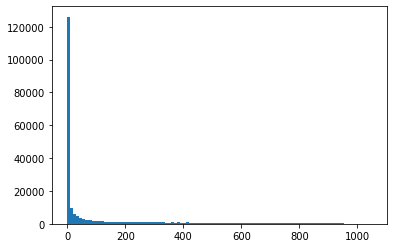

In [66]:
plt.hist(data.NN2L_NETSW.values.flatten(),bins=100);

In [67]:
scale_dict_RH['NN2L_NETSW'] = 1.

the *physical constraint* is  
1) Predict NN2L_NETSW
2) Take ReLU(NN2L_NETSW)

## NN2L_PRECC

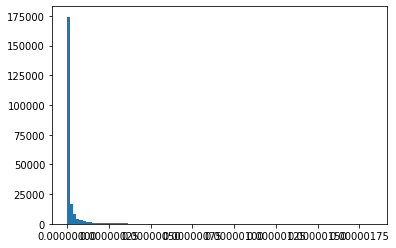

In [85]:
plt.hist(data.NN2L_PRECC.values.flatten(),bins=100);

In [87]:
scale_dict_RH['NN2L_PRECC'] = scale_dict1['PRECT']

(-200, 200)

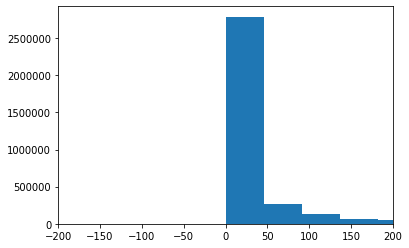

In [88]:
plt.hist((np.moveaxis(np.tile(scale_dict_RH['NN2L_PRECC'],(16,96,144,1)),-1,1)*\
          data.NN2L_PRECC.values).flatten(),bins=100);
plt.xlim((-200,200))

the *physical constraint* is  
1) Predict PRECC    
2) Take ReLU(PRECC)  

## NN_PRECL (CANCELLED OUTPUT BECAUSE ALWAYS ZERO)

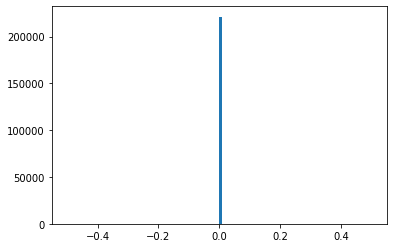

In [89]:
plt.hist(data.NN2L_PRECL.values.flatten(),bins=100);

In [90]:
scale_dict_RH['NN2L_PRECL'] = scale_dict1['PRECT']

In [96]:
scale_dict_RH['NN2L_PRECL']

2501000000.0

(-200, 200)

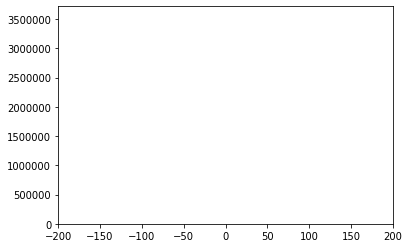

In [91]:
plt.hist((np.moveaxis(np.tile(scale_dict_RH['NN2L_PRECL'],(16,96,144,1)),-1,1)*\
          data.NN2L_PRECL.values).flatten(),bins=100);
plt.xlim((-200,200))

the *physical constraint* is  
1) Predict NN2L_PRECL   
2) Take ReLU(NN2L_PRECL)  

## NN2L_PRECSC

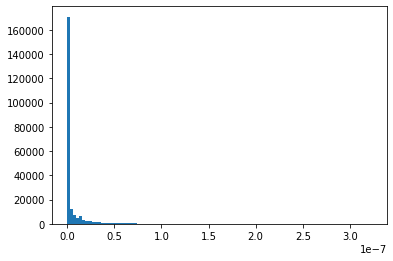

In [92]:
plt.hist(data.NN2L_PRECSC.values.flatten(),bins=100);

In [93]:
scale_dict_RH['NN2L_PRECSC'] = scale_dict1['PRECT']

(-200, 200)

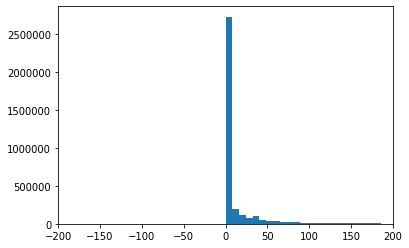

In [94]:
plt.hist((np.moveaxis(np.tile(scale_dict_RH['NN2L_PRECSC'],(16,96,144,1)),-1,1)*\
          data.NN2L_PRECSC.values).flatten(),bins=100);
plt.xlim((-200,200))

the *physical constraint* is  
1) Predict NN2L_PRECSC   
2) Take ReLU(NN2L_PRECSC)  

## NN2L_PRECSL  (CANCELLED OUTPUT BECAUSE ALWAYS ZERO)

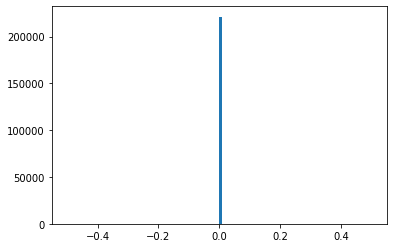

In [95]:
plt.hist(data.NN2L_PRECSL.values.flatten(),bins=100);

In [97]:
scale_dict_RH['NN2L_PRECSL'] = scale_dict1['PRECT']

(-200, 200)

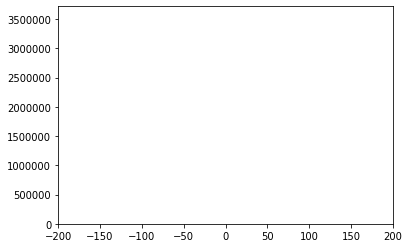

In [98]:
plt.hist((np.moveaxis(np.tile(scale_dict_RH['NN2L_PRECSL'],(16,96,144,1)),-1,1)*\
          data.NN2L_PRECSL.values).flatten(),bins=100);
plt.xlim((-200,200))

the *physical constraint* is  
1) Predict NN2L_PRECSL   
2) Take ReLU(NN2L_PRECSL)  

## NN2L_SOLL

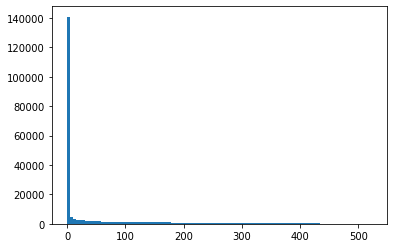

In [101]:
plt.hist(data.NN2L_SOLL.values.flatten(),bins=100);

In [102]:
scale_dict_RH['NN2L_SOLL'] = 1.

the *physical constraint* is  
1) Predict NN2L_SOLL
2) Take ReLU(NN2L_SOLL)  

## NN2L_SOLLD

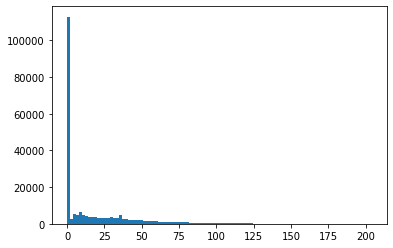

In [104]:
plt.hist(data.NN2L_SOLLD.values.flatten(),bins=100);

In [105]:
scale_dict_RH['NN2L_SOLLD'] = 1.

the *physical constraint* is  
1) Predict NN2L_SOLLD
2) Take ReLU(NN2L_SOLLD)  

## NN2L_SOLS

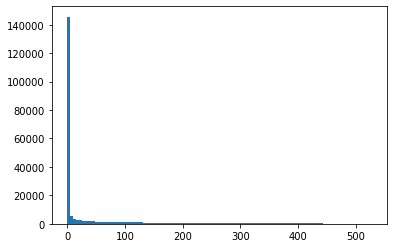

In [106]:
plt.hist(data.NN2L_SOLS.values.flatten(),bins=100);

In [107]:
scale_dict_RH['NN2L_SOLS'] = 1.

physical constraint is the same, just take ReLU to guarantee positivity

## NN2L_SOLSD

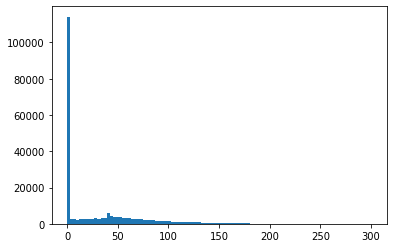

In [108]:
plt.hist(data.NN2L_SOLSD.values.flatten(),bins=100);

In [109]:
scale_dict_RH['NN2L_SOLSD'] = 1.

physical constraints is the same, just take ReLU to guarantee positivity

In [117]:
path_scaledict = '/home1/05823/tg851228/SPCAM/CBRAIN-CAM/nn_config/scale_dicts/'

In [119]:
hf = open(path_scaledict+'2020_10_16_scale_dict_RG.pkl','wb')
S = {"scale_dict_RG":scale_dict_RH}
pickle.dump(S,hf)
hf.close()

# Outputs

## Scale dict

In [35]:
!which pickle

which: no pickle in (/opt/apps/xalt/xalt/bin:/work/05823/tg851228/stampede2/MINICONDA/envs/cbrain_1/bin:/work/05823/tg851228/stampede2/MINICONDA/condabin:/opt/apps/cmake/3.16.1/bin:/opt/apps/autotools/1.1/bin:/opt/apps/git/2.24.1/bin:/opt/apps/libfabric/1.7.0/bin:/opt/apps/intel18/impi/18.0.2/bin:/opt/intel/compilers_and_libraries_2018.2.199/linux/mpi/intel64/bin:/opt/intel/compilers_and_libraries_2018.2.199/linux/bin/intel64:/opt/apps/gcc/6.3.0/bin:/usr/lib64/qt-3.3/bin:/usr/local/bin:/bin:/usr/bin:/opt/dell/srvadmin/bin:.)


In [36]:
scale_dict = load_pickle('/home1/05823/tg851228/SPCAM/CBRAIN-CAM/nn_config/scale_dicts/009_Wm2_out_vars.pkl')

In [37]:
scale_dict1 = load_pickle('/home1/05823/tg851228/SPCAM/CBRAIN-CAM/nn_config/scale_dicts/001_toms_scaling.pkl')

In [38]:
scale_dict1

{'PHQ': array([7.0811688e+07, 1.3074195e+08, 2.1416968e+08, 3.0895507e+08,
        3.8762448e+08, 4.4520454e+08, 4.4321338e+08, 3.6317286e+08,
        4.2725360e+08, 5.0264170e+08, 5.9133267e+08, 6.9567149e+08,
        8.1842150e+08, 9.6283104e+08, 1.1327212e+09, 1.3325868e+09,
        1.5677202e+09, 1.8443410e+09, 2.1697718e+09, 2.1706406e+09,
        1.9922205e+09, 1.6811768e+09, 1.2494753e+09, 7.2336192e+08,
        6.7863757e+08, 6.2842387e+08, 5.7302957e+08, 5.1279936e+08,
        4.4820157e+08, 3.7970438e+08], dtype=float32),
 'PHCLDLIQ': array([7.0811688e+07, 1.3074195e+08, 2.1416968e+08, 3.0895507e+08,
        3.8762448e+08, 4.4520454e+08, 4.4321338e+08, 3.6317286e+08,
        4.2725360e+08, 5.0264170e+08, 5.9133267e+08, 6.9567149e+08,
        8.1842150e+08, 9.6283104e+08, 1.1327212e+09, 1.3325868e+09,
        1.5677202e+09, 1.8443410e+09, 2.1697718e+09, 2.1706406e+09,
        1.9922205e+09, 1.6811768e+09, 1.2494753e+09, 7.2336192e+08,
        6.7863757e+08, 6.2842387e+08, 5.73

## Outputs

In [14]:
TCTEND = (data.TBC-data.TBP)/DT

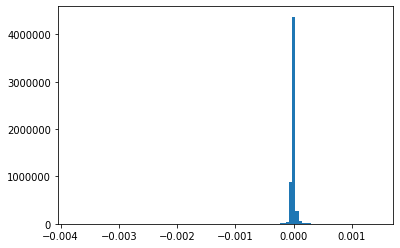

In [15]:
plt.hist(TCTEND.values.flatten(),bins=100);

In [16]:
TPTEND = (data.T-data.TBP)/DT

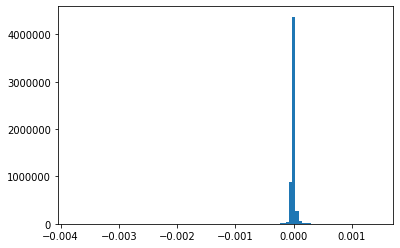

In [17]:
plt.hist(TPTEND.values.flatten(),bins=100);

In [18]:
QCTEND = (data.QBC-data.QBP)/DT

(0, 255000)

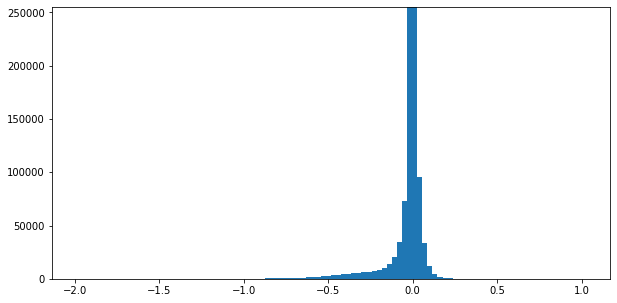

In [19]:
plt.figure(figsize=(10,5))
plt.hist(1e6*QCTEND.values.flatten(),bins=100);
plt.ylim((0,255000))

(0, 0.05)

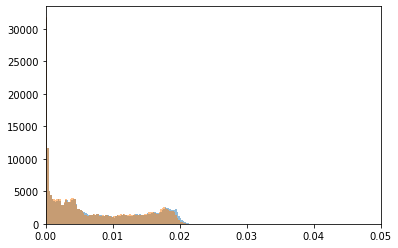

In [20]:
plt.hist(data.QBP[:,-1,:,:].values.flatten(),bins=100,alpha=0.5);
plt.hist(data.QBC[:,-1,:,:].values.flatten(),bins=100,alpha=0.5);
plt.xlim((0,0.05))

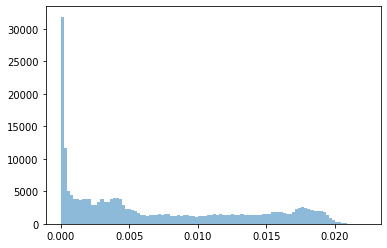

In [21]:
plt.hist(data.QBC[:,-1,:,:].values.flatten(),bins=100,alpha=0.5);

In [110]:
path_otherday = 'CESM2_f19_v13_updated_NN_pelayout01_ens_07.cam.h1.2003-03-20-00000.nc'

In [111]:
data2 = xr.open_dataset(path_folder+path_otherday)

In [115]:
data2.NN2L_PRECL.values.max()

0.0

In [116]:
data2.NN2L_PRECSL.values.max()

0.0

In [25]:
data2

<xarray.Dataset>
Dimensions:          (ilev: 27, lat: 96, lev: 26, lon: 144, nbnd: 2, time: 16)
Coordinates:
  * lat              (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon              (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lev              (lev) float64 3.545 7.389 13.97 23.94 ... 929.6 970.6 992.6
  * ilev             (ilev) float64 2.194 4.895 9.882 ... 956.0 985.1 1e+03
  * time             (time) object 2003-03-20 00:00:00 ... 2003-03-20 07:30:00
Dimensions without coordinates: nbnd
Data variables:
    gw               (lat) float64 ...
    hyam             (lev) float64 ...
    hybm             (lev) float64 ...
    P0               float64 ...
    hyai             (ilev) float64 ...
    hybi             (ilev) float64 ...
    date             (time) int32 ...
    datesec          (time) int32 ...
    time_bnds        (time, nbnd) object ...
    date_written     (time) |S8 ...
    time_written     (time) |S8 ...
    ndbase           int32 ...
    nsbase           int32 ...
    nbdate           int32 ...
    nbsec            int32 ...
    mdt              int32 ...
    ndcur            (time) int32 ...
    nscur            (time) int32 ...
    co2vmr           (time) float64 ...
    ch4vmr           (time) float64 ...
    n2ovmr           (time) float64 ...
    f11vmr           (time) float64 ...
    f12vmr           (time) float64 ...
    sol_tsi          (time) float64 ...
    nsteph           (time) int32 ...
    CLDICEAP         (time, lev, lat, lon) float32 ...
    CLDICEBC         (time, lev, lat, lon) float32 ...
    CLDICEBP         (time, lev, lat, lon) float32 ...
    CLDLIQAP         (time, lev, lat, lon) float32 ...
    CLDLIQBC         (time, lev, lat, lon) float32 ...
    CLDLIQBP         (time, lev, lat, lon) float32 ...
    CLOUD            (time, lev, lat, lon) float32 ...
    FLDS             (time, lat, lon) float32 ...
    FLNS             (time, lat, lon) float32 ...
    FLNT             (time, lat, lon) float32 ...
    FSDS             (time, lat, lon) float32 ...
    FSNS             (time, lat, lon) float32 ...
    FSNT             (time, lat, lon) float32 ...
    LHFLX            (time, lat, lon) float32 ...
    NN2L_BCPHIDRY    (time, lat, lon) float32 ...
    NN2L_BCPHIWET    (time, lat, lon) float32 ...
    NN2L_BCPHODRY    (time, lat, lon) float32 ...
    NN2L_CO2DIAG     (time, lat, lon) float32 ...
    NN2L_CO2PROG     (time, lat, lon) float32 ...
    NN2L_DSTDRY1     (time, lat, lon) float32 ...
    NN2L_DSTDRY2     (time, lat, lon) float32 ...
    NN2L_DSTDRY3     (time, lat, lon) float32 ...
    NN2L_DSTDRY4     (time, lat, lon) float32 ...
    NN2L_DSTWET1     (time, lat, lon) float32 ...
    NN2L_DSTWET2     (time, lat, lon) float32 ...
    NN2L_DSTWET3     (time, lat, lon) float32 ...
    NN2L_DSTWET4     (time, lat, lon) float32 ...
    NN2L_FLWDS       (time, lat, lon) float32 ...
    NN2L_NETSW       (time, lat, lon) float32 ...
    NN2L_OCPHIDRY    (time, lat, lon) float32 ...
    NN2L_OCPHIWET    (time, lat, lon) float32 ...
    NN2L_OCPHODRY    (time, lat, lon) float32 ...
    NN2L_PBOT        (time, lat, lon) float32 ...
    NN2L_PRECC       (time, lat, lon) float32 ...
    NN2L_PRECL       (time, lat, lon) float32 ...
    NN2L_PRECSC      (time, lat, lon) float32 ...
    NN2L_PRECSL      (time, lat, lon) float32 ...
    NN2L_PSL         (time, lat, lon) float32 ...
    NN2L_QBOT        (time, lat, lon) float32 ...
    NN2L_RHO         (time, lat, lon) float32 ...
    NN2L_SOLL        (time, lat, lon) float32 ...
    NN2L_SOLLD       (time, lat, lon) float32 ...
    NN2L_SOLS        (time, lat, lon) float32 ...
    NN2L_SOLSD       (time, lat, lon) float32 ...
    NN2L_TBOT        (time, lat, lon) float32 ...
    NN2L_THBOT       (time, lat, lon) float32 ...
    NN2L_UBOT        (time, lat, lon) float32 ...
    NN2L_VBOT        (time, lat, lon) float32 ...
    NN2L_ZBOT        (time, lat, lon) float32 ...
    PRECC            (time, la

In [26]:
data2.QBC.values

array([[[[1.80390680e-06, 1.80390680e-06, 1.80390680e-06, ...,
          1.80390680e-06, 1.80390680e-06, 1.80390680e-06],
         [1.80340157e-06, 1.80339657e-06, 1.80339305e-06, ...,
          1.80341942e-06, 1.80341237e-06, 1.80340760e-06],
         [1.80321285e-06, 1.80321058e-06, 1.80320876e-06, ...,
          1.80322286e-06, 1.80321911e-06, 1.80321592e-06],
         ...,
         [1.79203823e-06, 1.79198344e-06, 1.79192921e-06, ...,
          1.79219569e-06, 1.79214453e-06, 1.79209223e-06],
         [1.79234189e-06, 1.79231131e-06, 1.79227868e-06, ...,
          1.79242068e-06, 1.79239703e-06, 1.79237054e-06],
         [1.79272581e-06, 1.79272581e-06, 1.79272581e-06, ...,
          1.79272581e-06, 1.79272581e-06, 1.79272581e-06]],

        [[1.79382153e-06, 1.79382153e-06, 1.79382153e-06, ...,
          1.79382153e-06, 1.79382153e-06, 1.79382153e-06],
         [1.79379163e-06, 1.79379788e-06, 1.79380550e-06, ...,
          1.79377298e-06, 1.79377912e-06, 1.79378605e-06],
        

In [27]:
data2.TBC.values

array([[[[224.36955, 224.36955, 224.36955, ..., 224.36955, 224.36955,
          224.36955],
         [223.66774, 223.69522, 223.72635, ..., 223.59074, 223.61618,
          223.64293],
         [223.01718, 223.0762 , 223.13766, ..., 222.87074, 222.91643,
          222.9634 ],
         ...,
         [227.57184, 227.5877 , 227.6012 , ..., 227.51472, 227.53508,
          227.55402],
         [227.80241, 227.84062, 227.88382, ..., 227.72092, 227.74217,
          227.76952],
         [227.35808, 227.35806, 227.35806, ..., 227.35806, 227.35808,
          227.35808]],

        [[219.0596 , 219.0596 , 219.0596 , ..., 219.0596 , 219.0596 ,
          219.0596 ],
         [218.36218, 218.38295, 218.40862, ..., 218.30157, 218.32167,
          218.34348],
         [217.824  , 217.86707, 217.90825, ..., 217.71173, 217.74707,
          217.78218],
         ...,
         [226.71455, 226.73491, 226.74908, ..., 226.5798 , 226.63922,
          226.683  ],
         [226.13365, 226.21327, 226.29166, ..., 22

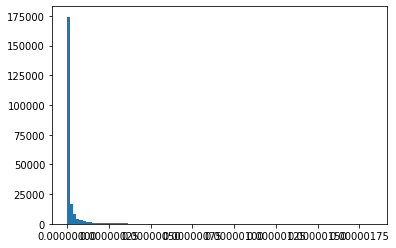

In [28]:
plt.hist(data.NN2L_PRECC.values.flatten(),bins=100);

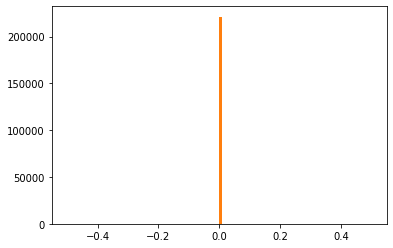

In [29]:
plt.hist(data.NN2L_PRECL.values.flatten(),bins=100);
plt.hist(data2.NN2L_PRECL.values.flatten(),bins=100);

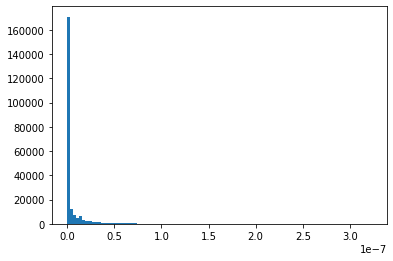

In [30]:
plt.hist(data.NN2L_PRECSC.values.flatten(),bins=100);

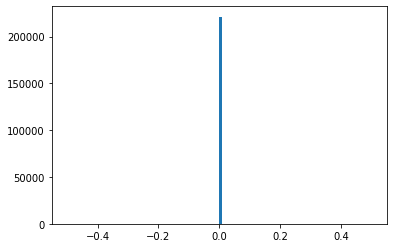

In [66]:
plt.hist(data.NN2L_PRECSL.values.flatten(),bins=100);

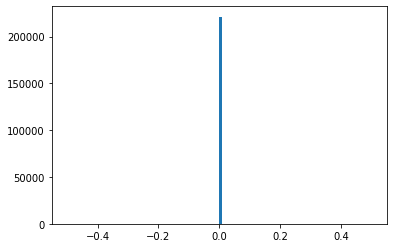

In [67]:
plt.hist(data2.NN2L_PRECSL.values.flatten(),bins=100);

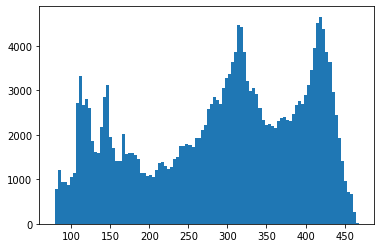

In [60]:
plt.hist(data.NN2L_FLWDS.values.flatten(),bins=100);

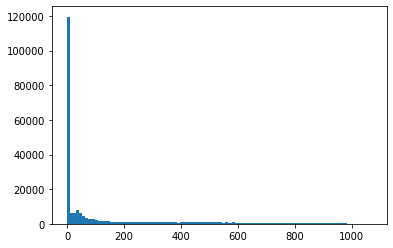

In [61]:
plt.hist(data.NN2L_NETSW.values.flatten(),bins=100);

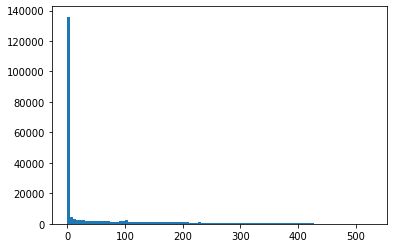

In [69]:
plt.hist(data.NN2L_SOLL.values.flatten(),bins=100);

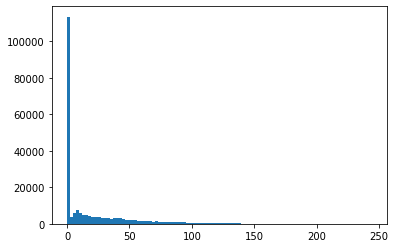

In [70]:
plt.hist(data.NN2L_SOLLD.values.flatten(),bins=100);

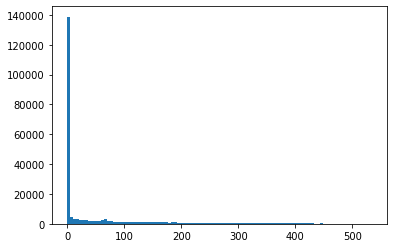

In [71]:
plt.hist(data.NN2L_SOLS.values.flatten(),bins=100);

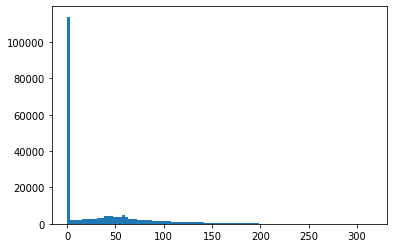

In [72]:
plt.hist(data.NN2L_SOLSD.values.flatten(),bins=100);